Weather Prediction System


In [240]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd
import numpy as np

In [241]:
# Import the dataset
df=pd.read_csv ("D:/Master Assignments/IOT/Project/Weather Prediction System/weather.csv")

In [242]:
selected_features = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'windspeed', 'sealevelpressure','precipprob','precipcover','cloudcover','conditions']
# Use loc to select only the specified columns
data = df.loc[:, selected_features]

In [243]:

label_encoder = LabelEncoder()
df['conditions_encoded'] = label_encoder.fit_transform(df['conditions'])

# Specify the columns for correlation matrix
selected_features = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'windspeed', 'sealevelpressure', 'precipprob', 'precipcover', 'cloudcover', 'conditions_encoded']

# Create a DataFrame with only the selected features
selected_data = df[selected_features]

# Check the correlation matrix
correlation_matrix = selected_data.corr()

# Display correlations with 'conditions_encoded'
correlation_with_target = correlation_matrix['conditions_encoded'].abs().sort_values(ascending=False)
print(correlation_with_target)

conditions_encoded    1.000000
precipprob            0.918870
precipcover           0.780611
cloudcover            0.736647
humidity              0.462939
tempmax               0.424124
feelslike             0.382253
temp                  0.374108
tempmin               0.293207
windspeed             0.229739
sealevelpressure      0.011227
Name: conditions_encoded, dtype: float64


In [244]:
print(data)

      tempmax  tempmin  temp  feelslike  humidity  windspeed  \
0        14.2     10.9  12.6       12.6      79.0       24.1   
1        15.6      6.2  10.8       10.6      74.5       11.5   
2        14.4      6.9  11.0       10.9      71.4        8.7   
3        15.8     10.3  13.0       13.0      59.8       12.6   
4        15.3     10.8  13.5       13.5      72.0       20.1   
...       ...      ...   ...        ...       ...        ...   
1995     15.5     11.3  13.8       13.8      71.1       16.6   
1996     14.9     11.6  13.6       13.6      68.9       15.9   
1997     16.5     11.6  13.9       13.9      66.5       22.1   
1998     16.9     10.0  14.0       14.0      66.4       18.2   
1999     16.8     11.0  13.9       13.9      68.1       20.8   

      sealevelpressure  precipprob  precipcover  cloudcover  \
0               1016.1       100.0         8.33        56.8   
1               1022.6         0.0         0.00         8.9   
2               1021.4         0.0        

<Axes: xlabel='conditions', ylabel='count'>

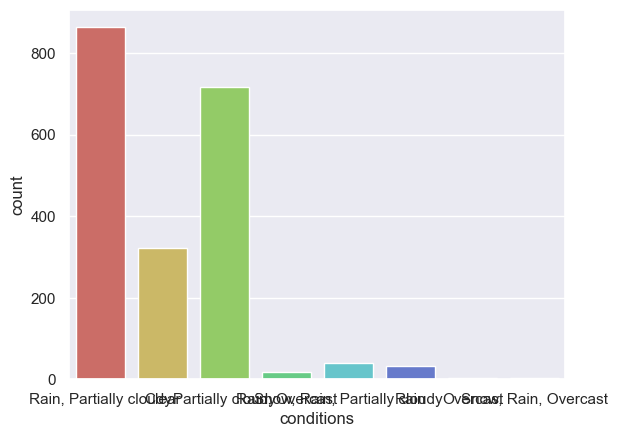

In [245]:
#Lets see categarical variables in a countplot
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="conditions", data=data, palette='hls')

In [246]:
#get the % values of conditions in the dataset
countrain=len(data[data.conditions=='Rain, Partially cloudy'])
countsun=len(data[data.conditions=='Clear'])
countdrizzle=len(data[data.conditions=='Partially cloudy'])
countsnow=len(data[data.conditions=='Rain, Overcast'])
countfog=len(data[data.conditions=='Snow, Rain, Partially cloudy'])
countfog=len(data[data.conditions=='Rain'])
print('Rain, Partially cloudy precentage   :{:2f}%'.format((countrain/(len(data.conditions))*100)))
print('Clear precentage    :{:2f}%'.format((countsun/(len(data.conditions))*100)))
print('Partially cloudy precentage:{:2f}%'.format((countdrizzle/(len(data.conditions))*100)))
print('Rain, Overcast precentage   :{:2f}%'.format((countsnow/(len(data.conditions))*100)))
print('Snow, Rain, Partially cloudy precentage    :{:2f}%'.format((countfog/(len(data.conditions))*100)))
print('Rain precentage    :{:2f}%'.format((countfog/(len(data.conditions))*100)))

Rain, Partially cloudy precentage   :43.150000%
Clear precentage    :16.050000%
Partially cloudy precentage:35.850000%
Rain, Overcast precentage   :0.950000%
Snow, Rain, Partially cloudy precentage    :1.650000%
Rain precentage    :1.650000%


In [247]:
data[['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'windspeed', 'sealevelpressure']].describe()

,tempmax,tempmin,temp,feelslike,humidity,windspeed,sealevelpressure
count,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,1999.000000
mean,19.79060,13.624750,16.647950,16.19195,71.568000,22.051650,1015.702301
std,7.79139,7.034177,7.264265,8.30191,9.196587,7.077245,6.061992
min,0.00000,-7.700000,-1.800000,-6.80000,43.200000,7.200000,993.800000
25%,13.50000,8.000000,10.600000,10.00000,64.900000,16.600000,1011.400000
50%,19.95000,13.800000,16.700000,16.70000,71.800000,21.700000,1015.100000
75%,26.90000,20.000000,23.400000,23.40000,78.000000,26.725000,1019.500000
max,38.00000,26.500000,30.700000,31.20000,96.800000,53.800000,1038.800000


<Axes: xlabel='windspeed', ylabel='Count'>

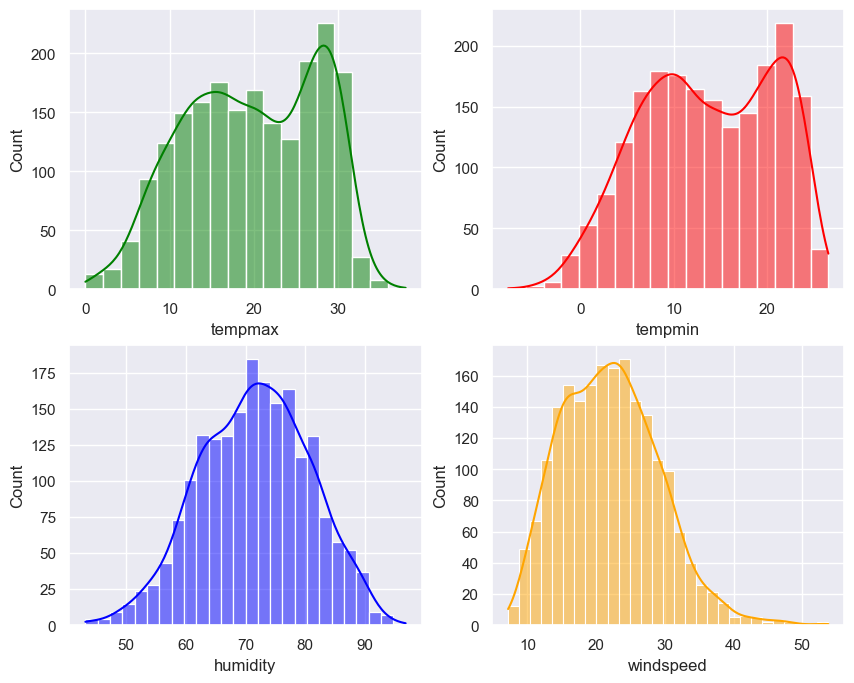

In [248]:
#distribution of these data
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='tempmax',kde=True,ax=axs[0,0],color='green') #positive 
sns.histplot(data=data,x='tempmin',kde=True,ax=axs[0,1],color='red') #outliers
sns.histplot(data=data,x='humidity',kde=True,ax=axs[1,0],color='blue') #outliers
sns.histplot(data=data,x='windspeed',kde=True,ax=axs[1,1],color='orange') #positive 

<Axes: xlabel='windspeed'>

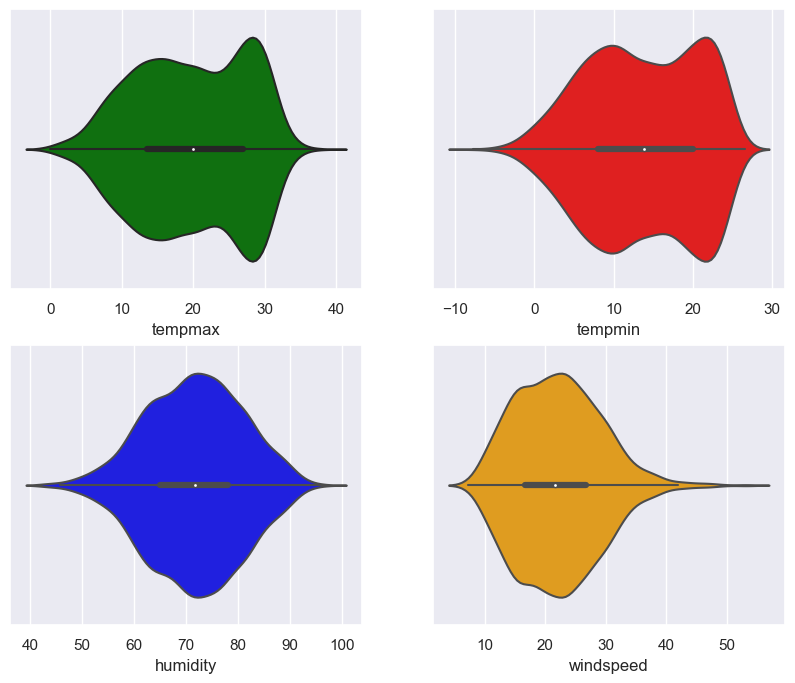

In [249]:
#violinplot
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='tempmax',kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x='tempmin',kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x='humidity',kde=True,ax=axs[1,0],color='blue')
sns.violinplot(data=data,x='windspeed',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='cloudcover', ylabel='conditions'>

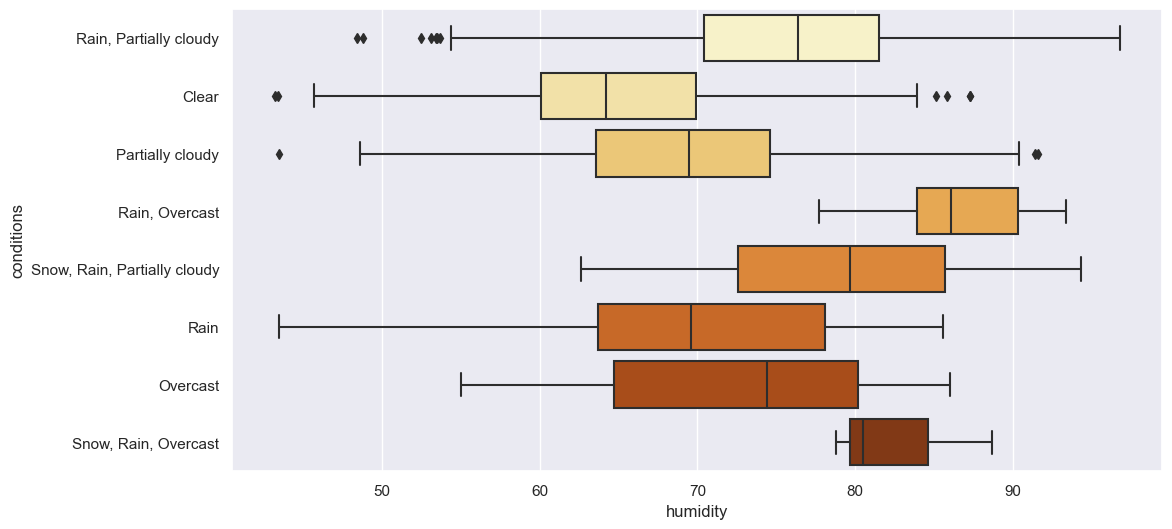

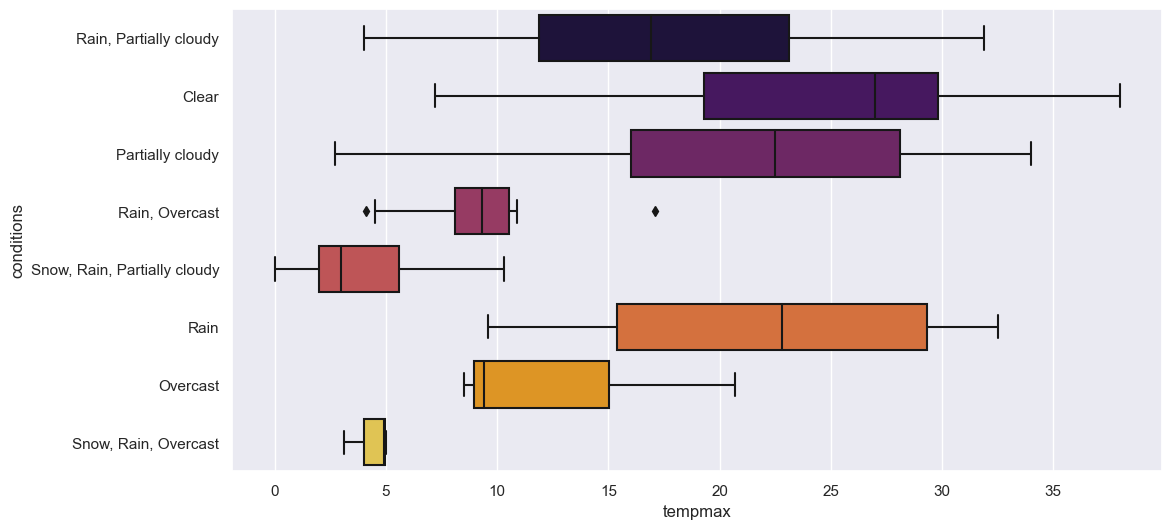

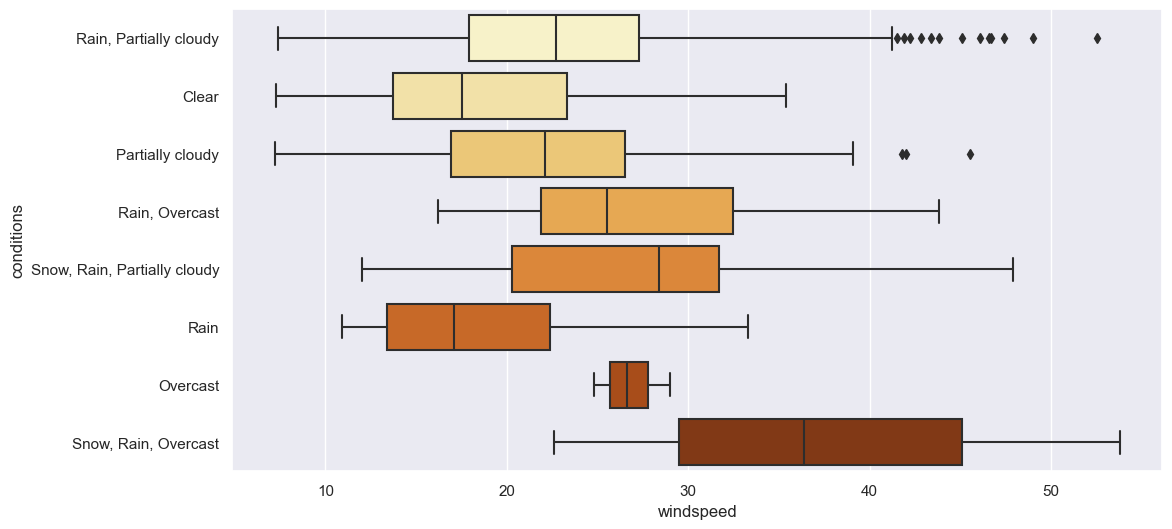

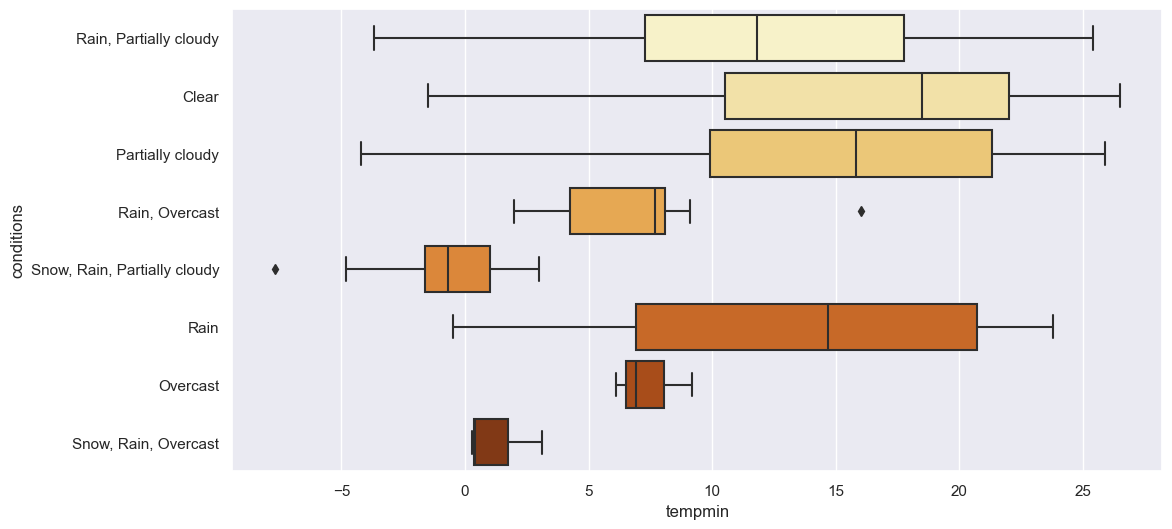

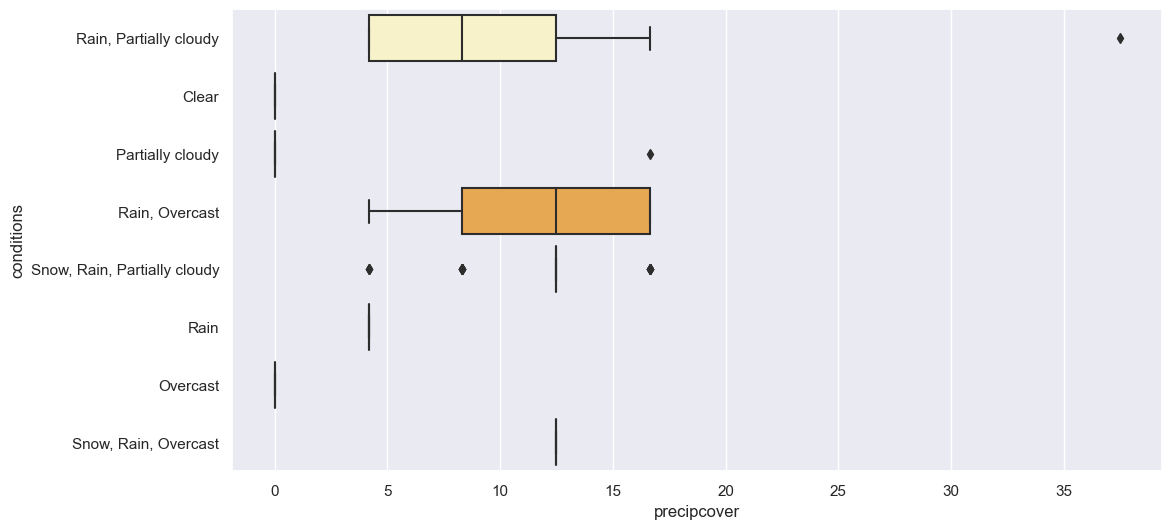

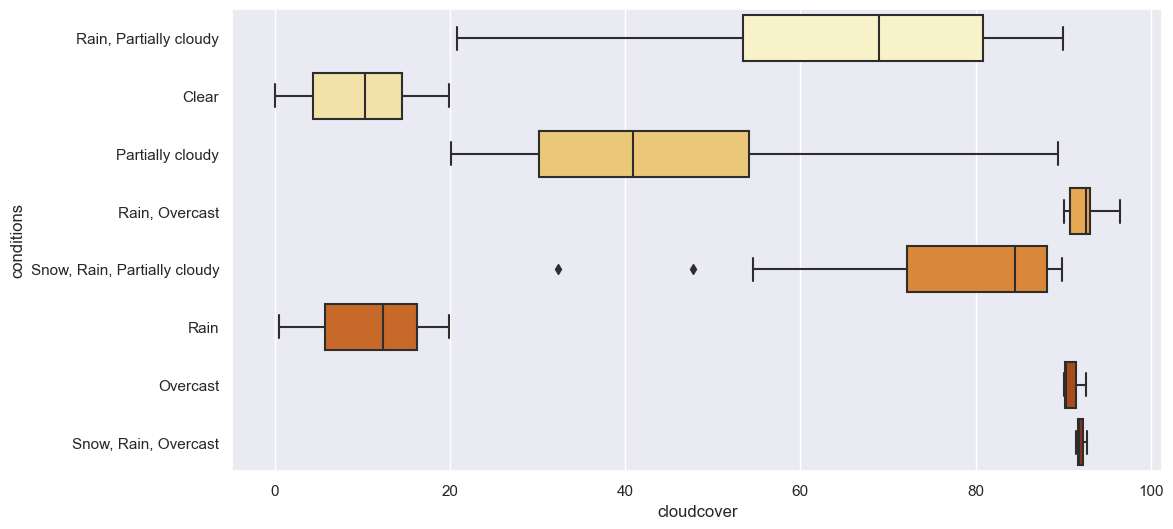

In [250]:
plt.figure(figsize=(12,6))
sns.boxplot(x='humidity',y='conditions',data=data,palette='YlOrBr') #

plt.figure(figsize=(12,6))
sns.boxplot(x='tempmax',y='conditions',data=data,palette='inferno')

plt.figure(figsize=(12,6))
sns.boxplot(x='windspeed',y='conditions',data=data,palette='YlOrBr') # every weather has some positive of outliers

plt.figure(figsize=(12,6))
sns.boxplot(x='tempmin',y='conditions',data=data,palette='YlOrBr')

plt.figure(figsize=(12,6))
sns.boxplot(x='precipcover',y='conditions',data=data,palette='YlOrBr')

plt.figure(figsize=(12,6))
sns.boxplot(x='cloudcover',y='conditions',data=data,palette='YlOrBr')

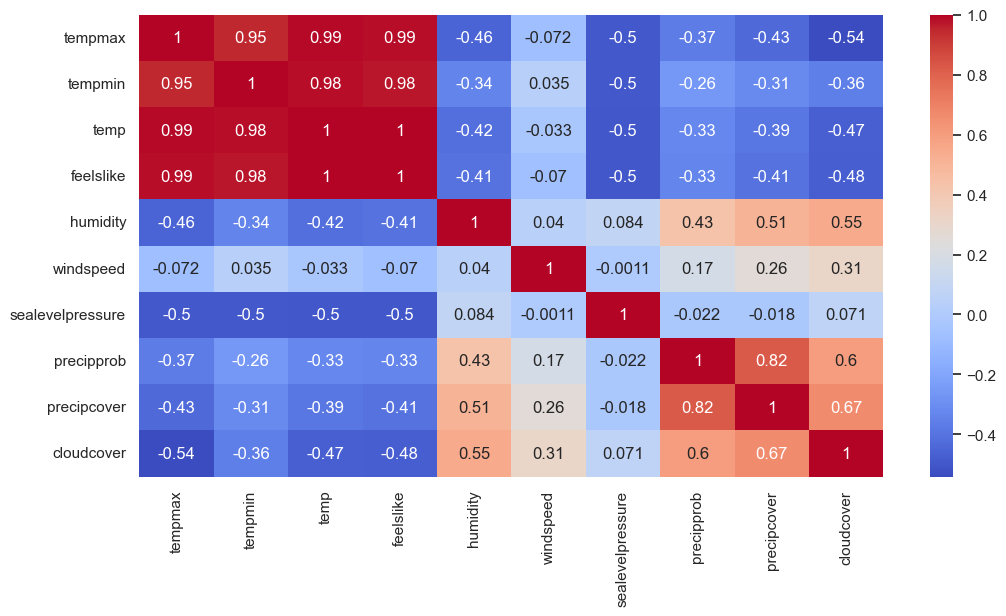

In [251]:
conditions_numeric = data.drop(['conditions'], axis=1).apply(pd.to_numeric, errors='coerce') #remove condition column bcs its non-numeric 
plt.figure(figsize=(12, 6))
sns.heatmap(conditions_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


pearsons correlation:  -0.4561591684255291
T test and P value:  Ttest_indResult(statistic=192.10907591586303, pvalue=0.0)
pearsons correlation:  -0.07210316334568707
T test and P value:  Ttest_indResult(statistic=9.606577233127155, pvalue=1.2817014552993111e-21)
pearsons correlation:  0.950354139161111
T test and P value:  Ttest_indResult(statistic=26.269143526330943, pvalue=1.9202587372102012e-140)


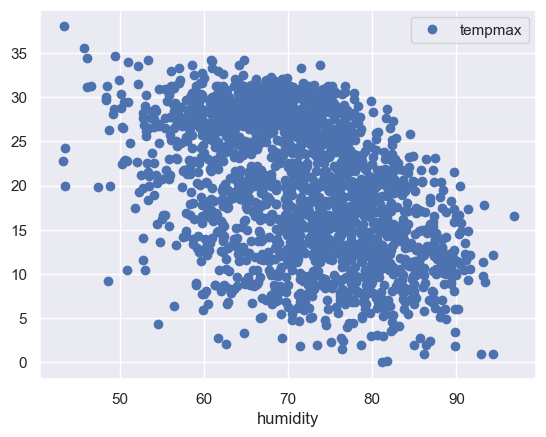

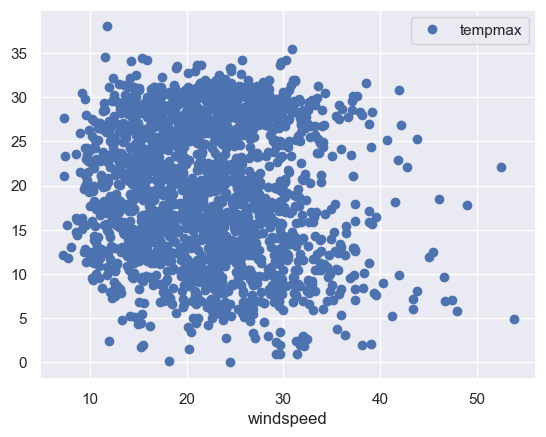

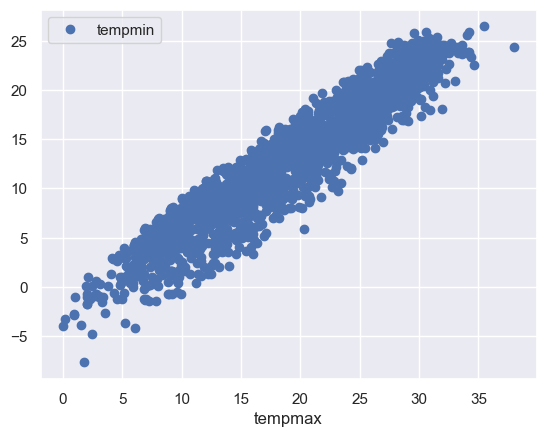

In [252]:
data.plot("humidity",'tempmax',style='o')
print('pearsons correlation: ',data['humidity'].corr(data['tempmax']))
print('T test and P value: ',stats.ttest_ind(data['humidity'],data['tempmax']))

data.plot("windspeed",'tempmax',style='o')
print('pearsons correlation: ',data['windspeed'].corr(data['tempmax']))
print('T test and P value: ',stats.ttest_ind(data['windspeed'],data['tempmax']))

data.plot('tempmax','tempmin',style='o')
print('pearsons correlation: ',data['tempmax'].corr(data['tempmin']))
print('T test and P value: ',stats.ttest_ind(data['tempmax'],data['tempmin']))

In [253]:
data.isna().sum() 

tempmax             0
tempmin             0
temp                0
feelslike           0
humidity            0
windspeed           0
sealevelpressure    1
precipprob          0
precipcover         0
cloudcover          0
conditions          0
dtype: int64

In [254]:
# Fill missing values in 'sealevelpressure' with the mean of the column
data['sealevelpressure'].fillna(data['sealevelpressure'].mean(), inplace=True)

In [255]:
# Check again for missing values
print(data.isna().sum())

tempmax             0
tempmin             0
temp                0
feelslike           0
humidity            0
windspeed           0
sealevelpressure    0
precipprob          0
precipcover         0
cloudcover          0
conditions          0
dtype: int64


In [256]:
numeric_data = data.select_dtypes(include=[np.number])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Apply the filtering based on IQR to the original DataFrame
filtered_data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [257]:
data.humidity=np.sqrt(data.humidity)
data.windspeed=np.sqrt(data.windspeed)
data.tempmax=np.sqrt(data.tempmax)
data.tempmin=np.sqrt(data.tempmin)
data.precipcover=np.sqrt(data.precipcover)
data.cloudcover=np.sqrt(data.cloudcover)



<Axes: xlabel='precipcover', ylabel='Count'>

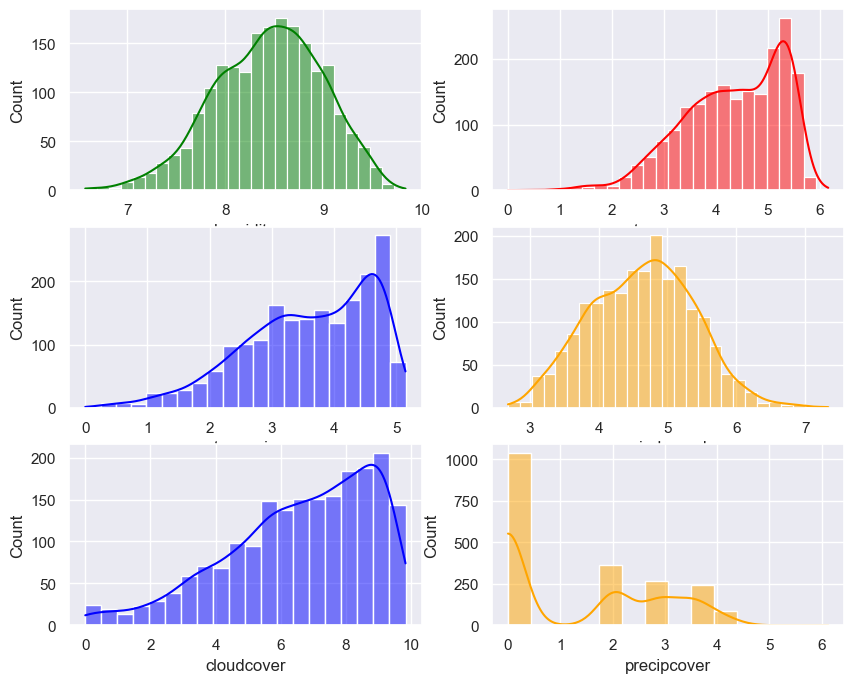

In [258]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(3,2,figsize=(10,8))
sns.histplot(data=data,x="humidity",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="tempmin",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="windspeed",kde=True,ax=axs[1,1],color='orange')
sns.histplot(data=data,x="cloudcover",kde=True,ax=axs[2,0],color='blue')
sns.histplot(data=data,x="precipcover",kde=True,ax=axs[2,1],color='orange')


In [259]:
data.head()

,tempmax,tempmin,temp,feelslike,humidity,windspeed,sealevelpressure,precipprob,precipcover,cloudcover,conditions
0,3.768289,3.301515,12.6,12.6,8.888194,4.909175,1016.1,100.0,2.886174,7.536577,"Rain, Partially cloudy"
1,3.949684,2.489980,10.8,10.6,8.631338,3.391165,1022.6,0.0,0.000000,2.983287,Clear
2,3.794733,2.626785,11.0,10.9,8.449852,2.949576,1021.4,0.0,0.000000,6.841053,Partially cloudy
3,3.974921,3.209361,13.0,13.0,7.733046,3.549648,1017.0,0.0,0.000000,7.245688,Partially cloudy
4,3.911521,3.286335,13.5,13.5,8.485281,4.483302,1013.9,100.0,2.042058,6.708204,"Rain, Partially cloudy"


In [260]:
lc=LabelEncoder()
data['conditions']=lc.fit_transform(data['conditions'])

In [261]:

data.head()


,tempmax,tempmin,temp,feelslike,humidity,windspeed,sealevelpressure,precipprob,precipcover,cloudcover,conditions
0,3.768289,3.301515,12.6,12.6,8.888194,4.909175,1016.1,100.0,2.886174,7.536577,5
1,3.949684,2.489980,10.8,10.6,8.631338,3.391165,1022.6,0.0,0.000000,2.983287,0
2,3.794733,2.626785,11.0,10.9,8.449852,2.949576,1021.4,0.0,0.000000,6.841053,2
3,3.974921,3.209361,13.0,13.0,7.733046,3.549648,1017.0,0.0,0.000000,7.245688,2
4,3.911521,3.286335,13.5,13.5,8.485281,4.483302,1013.9,100.0,2.042058,6.708204,5


In [262]:
selected_conditions = data[data['conditions'].isin([ 5])]
print(selected_conditions)

       tempmax   tempmin  temp  feelslike  humidity  windspeed  \
0     3.768289  3.301515  12.6       12.6  8.888194   4.909175   
4     3.911521  3.286335  13.5       13.5  8.485281   4.483302   
5     3.781534  2.701851  11.3       11.2  8.712061   3.224903   
8     3.911521  3.000000  11.7       10.3  9.088454   4.888763   
10    4.312772  3.016621  13.1       12.9  9.316652   4.000000   
...        ...       ...   ...        ...       ...        ...   
1989  3.114482  2.645751   8.3        5.8  8.803408   4.868265   
1990  2.949576  2.302173   7.1        5.2  8.809086   4.449719   
1991  3.114482  1.224745   6.1        4.7  8.927486   3.924283   
1995  3.937004  3.361547  13.8       13.8  8.432082   4.074310   
1996  3.860052  3.405877  13.6       13.6  8.300602   3.987480   

      sealevelpressure  precipprob  precipcover  cloudcover  conditions  
0               1016.1       100.0     2.886174    7.536577           5  
4               1013.9       100.0     2.042058    6.708204

In [263]:

x = data.loc[:, data.columns != 'conditions'].astype(float).values
y = data['conditions'].values

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [265]:
param_grid = {  # Tune the hyperparameters of out XGBoost model to optimize its performance. 
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [266]:
best_params = grid_search.best_params_
final_xgb_model = XGBClassifier(**best_params)
final_xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [267]:
from sklearn.preprocessing import StandardScaler  #Scale our numerical features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [268]:
# Define  classifier 
classifier = XGBClassifier()


In [269]:
import warnings
warnings.filterwarnings('ignore')
xgb = XGBClassifier(**grid_search.best_params_)
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:98.50%


In [270]:
import pickle
file = 'model.pkl'
pickle.dump(xgb, open(file, 'wb'))